I used Kaggle's Titanic problem and tried to predict the survival rate on the Titanic using a logistic regression model.

Codes are followed by a description

In [19]:
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
pd.set_option('display.max_columns',20)
os.chdir("C:\\users\julie\pJupyterProjects\Data Science")

train=pd.read_csv("titanic_train.csv")
print(train.head())
print(train.info())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

The head() method indicates that the survived and sibling spouse (SibSp) column uses 0s and 1s, and that the Sex column is an object (maybe will be converted to 0s and 1s for the model).
The info() method shows that there are some missing values in the Age, Cabin, and Embarked column.

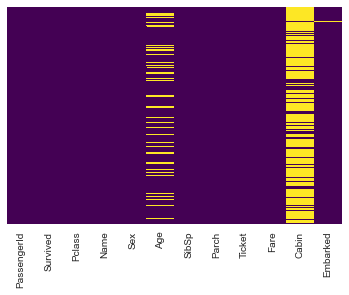

In [20]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

This is a heatmap of the Boolean values where the yellow is the missing data and purple is the data that is available.
The age column has around 20% of missing value and there are enough categories that we can use to fill in that gap (by predicting the age of these passengers). However, for the cabin column, there are too much missing values and thus it is not worth trying to fix it with the model.

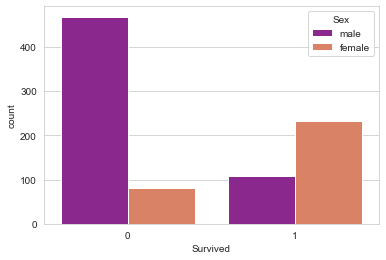

In [21]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train,hue='Sex',palette='plasma')
plt.show()

This is an exploratory analysis of who survived vs who did not survive. 0 indicate that the person did not survive and 1 
means they did survive.

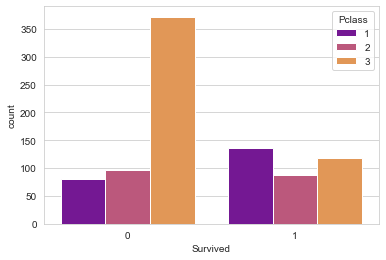

In [22]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train,hue='Pclass',palette='plasma')
plt.show()

The people that survived were most likely in the 1st passenger class whereas most people that did not 
survive were in the 3rd passenger class (the poorer class).

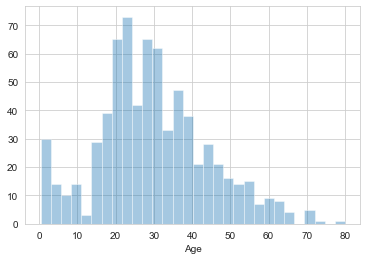

In [23]:
sns.set_style('whitegrid')
sns.distplot(train['Age'].dropna(),kde=False,bins=30)
plt.show()

import warnings
warnings.filterwarnings('ignore')

The bimodal distribution shows that there are a lot of babies, and people in their teens/adulthood and that the amount of 
people decreases the older they are. 

We can now clean our data so that it's in a compatible form for the machine learning algorithm. One way to complete the 
missing data from the age column is to simply insert the (in the missing rows) the average age of that column. However, 
we can check the average age by passenger class. 

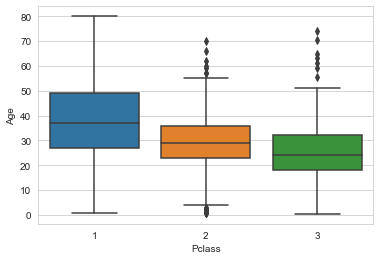

In [24]:
sns.boxplot(x='Pclass',y='Age',data=train)
plt.show()

Shows that people in the 1st class are older than people in the 2nd or 3rd class, on average.
We can use this mean value per class to fill in the missing values in the Age column.

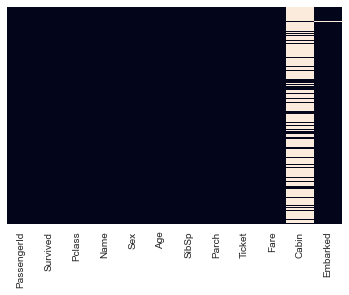

In [25]:
def asd(x):
    b = x[0]
    Pclass=x[1]
    if pd.isnull(b):
        if Pclass ==1:
            return 37
        if Pclass==2:
            return 29
        else:
            return 24
    else:
        return b

train['Age']=train[['Age','Pclass']].apply(asd,axis=1)
sns.heatmap(train.isnull(),yticklabels=False,cbar=False)
plt.show()

train.drop("Cabin",axis=1,inplace=True)
train.dropna(inplace=True)

The matrix demonstrates that the age column has been filled with reasonable values. 
Removed the Cabin column from the dataFrame and used inplace to make sure this is permanent. 
train.dropna() dropped the missing values from the dataFrame (e.g., from the embarked column).

In [26]:
embark = pd.get_dummies(train['Embarked'],drop_first=True)
print(embark.head())

   Q  S
0  0  1
1  0  0
2  0  1
3  0  1
4  0  1


The dummy variable allows a machine learning algorithm to understand columns that are objects (in string notation).
To avoid the multicollinearity issue, the drop_first=True was used to remove the first column.

In [27]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)
train = pd.concat([train,sex,embark],axis=1)
train.drop(["Sex","Embarked","Name","Ticket"],axis=1,inplace=True)
train.drop(["PassengerId"],axis=1,inplace =True)
print(train.head())

   Survived  Pclass   Age  SibSp  Parch     Fare  male  Q  S
0         0       3  22.0      1      0   7.2500     1  0  1
1         1       1  38.0      1      0  71.2833     0  0  0
2         1       3  26.0      0      0   7.9250     0  0  1
3         1       1  35.0      1      0  53.1000     0  0  1
4         0       3  35.0      0      0   8.0500     1  0  1


Added the newly created columns (dummies) at the end of the DataFrame (the name of those columns are male, Q, and S).
Dropped the columns from the Data Frame that are still objects (str) and the passengerID column (since it is no an indicator of survival rate).

The dataFrame is all numerical and compatible with machine learning algorithm.

In [28]:
X=train[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q','S']]   
y=train['Survived']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)   

lg=LogisticRegression(max_iter=1000)
lg.fit(X_train,y_train)

prediction=lg.predict(X_test)

print(classification_report(y_test,prediction))
print(confusion_matrix(y_test,prediction))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87       163
           1       0.85      0.69      0.76       104

    accuracy                           0.83       267
   macro avg       0.84      0.81      0.82       267
weighted avg       0.83      0.83      0.83       267

[[150  13]
 [ 32  72]]


The results are not bad considering we're using a subset of the data.

Time to compare this with other types of models, starting with  a neural network model.

In [34]:
X=train[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q','S']]   
y=train['Survived']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense,Dropout


scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)         
X_test = scaler.transform(X_test)

model = Sequential()
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=6)
model.add(Dense(units=30,activation='relu'))
model.add(Dropout(rate=0.5))         
model.add(Dense(units=15,activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam')
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),callbacks=[early_stop])

Epoch 1/600
21/21 [==============================] - 0s 6ms/step - loss: 0.6951 - val_loss: 0.6457
Epoch 2/600
21/21 [==============================] - 0s 2ms/step - loss: 0.6646 - val_loss: 0.6179
Epoch 3/600
21/21 [==============================] - 0s 2ms/step - loss: 0.6484 - val_loss: 0.6016
Epoch 4/600
21/21 [==============================] - 0s 2ms/step - loss: 0.6236 - val_loss: 0.5868
Epoch 5/600
21/21 [==============================] - 0s 2ms/step - loss: 0.6384 - val_loss: 0.5769
Epoch 6/600
21/21 [==============================] - 0s 2ms/step - loss: 0.6486 - val_loss: 0.5741
Epoch 7/600
21/21 [==============================] - 0s 2ms/step - loss: 0.6280 - val_loss: 0.5682
Epoch 8/600
21/21 [==============================] - 0s 2ms/step - loss: 0.6156 - val_loss: 0.5577
Epoch 9/600
21/21 [==============================] - 0s 2ms/step - loss: 0.6191 - val_loss: 0.5466
Epoch 10/600
21/21 [==============================] - 0s 2ms/step - loss: 0.5892 - val_loss: 0.5376
Epoch 11/

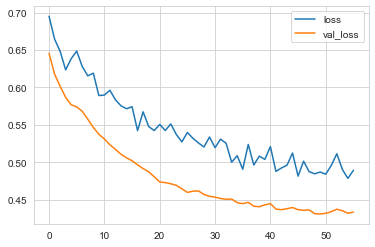

              precision    recall  f1-score   support

           0       0.82      0.92      0.87       144
           1       0.82      0.62      0.71        79

    accuracy                           0.82       223
   macro avg       0.82      0.77      0.79       223
weighted avg       0.82      0.82      0.81       223

[[133  11]
 [ 30  49]]


In [35]:
a = pd.DataFrame(model.history.history)
a.plot()
plt.show()

prediction = (model.predict(X_test) > 0.5).astype("int32")

print(classification_report(y_test,prediction))
print(confusion_matrix(y_test,prediction))

The neural network model did not perform better than the logistic model (probably due to a small dataset).

Now time to compare with a Random Forest model.

In [37]:
from sklearn.ensemble import RandomForestClassifier

X=train[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q','S']]   
y=train['Survived']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

model = RandomForestClassifier(n_estimators=2000)
model.fit(X_train,y_train)

prediction = model.predict(X_test)
print(classification_report(y_test,prediction))
print(confusion_matrix(y_test,prediction))

              precision    recall  f1-score   support

           0       0.84      0.87      0.85       142
           1       0.75      0.70      0.73        81

    accuracy                           0.81       223
   macro avg       0.79      0.78      0.79       223
weighted avg       0.81      0.81      0.81       223

[[123  19]
 [ 24  57]]


In [ ]:
The Random Forest model did not perform better than the neural network model.